**Álgebra Lineal Computacional**

**TP 1**
---

*Integrantes:*

*   Pedro Joel Burgos - LU 804/18

*   Martín Menalled - LU 339/22

Ejercicio 1

In [1]:
import numpy as np

def descompLU(A): #Recibe una matriz y la factoriza con el método LU sin pivoteo. Devuelve dos matrices: L y U.
    n=A.shape[0] # Sacamos el n de la matriz
    if np.linalg.det(A)==0:
        I=np.eye(n)
        return I,A
    else:
        if n==1:
            I=np.eye(1)
            return I, A
        else:
            if A[0,0]==0:
                return np.eye(n),A
            else:
                A11=A[0,0]
                A12=A[0,1:]
                A21=A[1:,0]
                A22=A[1:, 1:]
                L=np.zeros([n,n])
                U=np.zeros([n,n])
                L21=A21/A11
                L[1:,0] = L21
                U12=A12
                resta = L21.reshape(-1, 1) @ U12.reshape(1, -1)
                LU=A22-resta
                Ele, uu=descompLU(LU)
                L[0,0]=1
                L[1:,1:]=Ele
                U[0,0]=A11
                U[0,1:]=A12
                U[1:,1:]=uu
                for i in range(n):
                    if L[i,i]==0 or U[i,i]==0:
                        return np.eye(n),A
                return L,U
    
Matriz_eje1 = np.array([[2, -3, 5], [6, -1, 3], [-4, 1, -2]])
L, U = descompLU(Matriz_eje1)
print("Matriz L:")
print(L)
print("Matriz U:" )
print(U)
print("\n")

Matriz_eje2 = np.array([[1,1,1],[1,1,2],[1,3,5]])
L, U = descompLU(Matriz_eje2)
print("Matriz L:")
print(L)
print("Matriz U:")
print(U)


Matriz L:
[[ 1.     0.     0.   ]
 [ 3.     1.     0.   ]
 [-2.    -0.625  1.   ]]
Matriz U:
[[  2.   -3.    5. ]
 [  0.    8.  -12. ]
 [  0.    0.    0.5]]


Matriz L:
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
Matriz U:
[[1 1 1]
 [1 1 2]
 [1 3 5]]


Ejercicio 3

In [2]:
from scipy.linalg import solve_triangular 

# Importamos la funcion solve_triangular, que dada una matriz triangular A y un vector b , nos resuelve el sistema Ax=b

def resolverLU(A, b):
    L, U = descompLU(A) # Reutilizamos la funcion del punto anterior
    y = solve_triangular(L, b, lower=True) # El vector 'y' tiene la solucion del sistema Ly=b . lower=True significa que la matriz es triangular inferior.
    x = solve_triangular(U, y, lower=False) # El vector 'x' tiene la solucion que buscamos (de Ax=b). lower=False significa que la matriz es triangular inferior.
    return x 

Matriz_eje3 = np.array([[1,2,1],[2,5,1],[-1,1,2]])
Matriz_b = np.array([3,4,3])

resolverLU(Matriz_eje3,Matriz_b)

array([1., 0., 2.])

Ejercicio 4

In [3]:
from scipy.linalg import lu_factor, solve_triangular

# Creamos la matriz aleatoria A y el vector aleatorio b
# por defecto, la función np.random.rand nos devuelve numeros aleatorios en el intervalo [0,1)
# pero nosotros queremos que esten en el intervalo [-1,1). Entonces ampliamos ese intervalo multiplicandolo por 2
# (pasamos a tener valores en el intervalo [0,2) ) y despues desplazamos todo el intervalo hacia la izquierda restando 1
# (pasamos a tener valores en el intervalo [-1,1) como buscabamos

A = np.random.rand(10, 10) * 2 - 1
b = np.random.rand(10) * 2 - 1

# Resolvemos el sistema con la función del ejercicio anterior. 
# En lugar de usar ˜x , llamamos 'z' al vector solucion que nos devuelve la función

z = resolverLU(A, b)

# Ahora calculamos el error relativo. Calculamos la norma 2 de b' = Az , menos la norma 2 de b, y dividimos por la norma 2 de b
# Cuando no le especificamos a la fucion linalg.norm que norma queremos, por defecto calcula la norma 2

e = np.linalg.norm(np.dot(A, z) - b) / np.linalg.norm(b)


print("La matriz aleatoria es:", A)
print("El vector aleatorio es:", b)
print("El error relativo es:", e)

La matriz aleatoria es: [[-0.88420144 -0.79969952  0.07354148 -0.52863353  0.10937282  0.26833319
  -0.77672093 -0.6352915   0.94768231 -0.65287999]
 [ 0.10817712  0.4920954   0.79422809  0.61731712  0.61389306  0.93241393
   0.86826828 -0.0527224  -0.03196747 -0.07753102]
 [-0.06037802  0.82778593 -0.21474795  0.77309652 -0.77820896  0.8237258
   0.49183032 -0.23939676 -0.06012235  0.59604048]
 [ 0.85335155 -0.48301288 -0.63388398  0.99888329  0.93450612 -0.54926758
  -0.00114001  0.51507221  0.99690183 -0.64846844]
 [ 0.94481349  0.51701346  0.3683592   0.96565273 -0.44778862 -0.7189584
   0.20135321 -0.02081121  0.69076278 -0.50165939]
 [ 0.77409147  0.97222938 -0.08399073  0.26909175  0.23120573  0.00155035
  -0.9171219   0.39981843  0.1928412   0.07294486]
 [ 0.84023123  0.98346219  0.2044838   0.66561405  0.40460219 -0.47193835
   0.98794575  0.94587901 -0.95434891  0.29930048]
 [-0.33744581  0.70822018  0.53498158  0.27727527 -0.63885966 -0.17729234
  -0.4845813  -0.69037232  0.

Conclusión: Tras probar el código varias veces, el error relativo nos dió mayormente valores entre 1 y 200. consideramos que este error es notable aunque va a depender del objetivo de uso que le demos a esta resolución del sistema. Seguramente la matriz se encuentra mal condicionada, es decir, que pequeñas perturbaciones en b, pueden generar grandes cambios en la solución, y también otro factor que pensamos que contribuye, es el orden de la matriz A y del vector b que al ser de un tamaño considerable, aumenta el error relativo.



Ejercicio 5

In [4]:
from scipy.linalg import solve_triangular

def inversa(A):
    
    n = A.shape[0]
    # n es el orden que tiene la matriz
    
    # Obtenemos la descomposición LU de la matriz A
    L, U = descompLU(A)
    
    # Creamos la matriz identidad de tamaño n x n
    I = np.eye(n)
    
    # Creamos una matriz para almacenar las soluciones de los sistemas 
    #Ly = v y Ux = y
    
    invA = np.zeros((n, n))
    
    # Para cada columna de la matriz identidad, resolvemos los sistemas Ly = v y Ux = y
    for i in range(n):
        v = I[:, i]
        y = solve_triangular(L, v, lower=True)
        x = solve_triangular(U, y, lower=False)
        invA[:, i] = x             
    # La columna i de la matriz invA va a cargarse con la solucion x
    
    return invA # Por último devolvemos la inversa de la matriz A

Ejercicio 6

In [5]:
A = np.random.rand(10, 10) * 2 - 1  # Generamos una matriz aleatoria de 10x10 en el intervalo [-1,1)

A_inv = inversa(A)       # Calculamos la inversa de A con la funcion creada en el punto anterior

B = np.dot(A_inv, A)     # producto escalar de A^(-1) * A

I = np.eye(10)           # Generamos una matriz identidad de tamaño 10x10

e = np.linalg.norm(B - I,"fro")
# https://www.youtube.com/watch?v=9IGaV_3HnGg ve este video ,es muy simple

print("La matriz A es:", B)
print("error en norma Frobenius es:", e)

La matriz A es: [[ 1.00000000e+00 -1.53262626e-15  1.31212067e-14  1.10500355e-14
  -4.16533564e-15  1.49690630e-14 -1.65947983e-14  2.40675047e-16
   3.48630449e-15  5.77252648e-15]
 [ 3.72523469e-15  1.00000000e+00 -1.74949573e-14 -5.03499595e-15
  -7.28259887e-15 -1.47856058e-14  2.24655472e-14 -2.49347756e-16
  -3.83679105e-15 -1.28973767e-14]
 [ 4.76837585e-15  4.98767373e-15  1.00000000e+00 -2.66100185e-14
   7.84070458e-15 -3.36342861e-14  4.63057510e-14  2.83580754e-15
  -1.17369659e-14 -1.66822428e-14]
 [-1.76328264e-15  2.45911685e-15 -2.00494645e-15  1.00000000e+00
  -3.02443072e-16 -1.62015276e-15  9.43103436e-15  4.89739847e-16
   1.04432883e-15  7.44298154e-16]
 [ 7.67952636e-16  5.53459605e-15 -3.22240808e-15 -9.27717682e-15
   1.00000000e+00 -5.24073903e-15 -2.50937391e-15  1.59646276e-15
  -2.38549959e-15  2.00091069e-15]
 [ 1.03705888e-15 -2.00670774e-15  1.42358586e-15  2.27272842e-15
  -5.54927865e-16  1.00000000e+00 -8.09613087e-15 -5.11233518e-16
  -8.44483045e-16

Ejercicio 7

In [6]:

tam_inicial = 10       # tamaño inicial de la matriz de cada iteracion
tam_final = 201        # tamaño final de la matriz de cada iteracion
cant_iteraciones = 10  # número de veces que se repite el experimento

v1 = np.zeros(tam_final)  # creamos un vector para almacenar los errores del primer método
v2 = np.zeros(tam_final)  # creamos un vector para almacenar los errores del segundo método

for n in range(tam_inicial,tam_final): 
    for j in range(cant_iteraciones):           
        # para el tamaño de cada matriz iteramos 10 veces
        
        # Generamos una matriz y vector aleatorios
        A = np.random.rand(n, n) * 2 - 1  
        
        # Generamos un vector aleatorio x de tamaño n con valores en el intervalo [-1, 1)
        x = np.random.rand(n) * 2 - 1
        
        b = A @ x

        # Resolvemos sistema Ax = b utilizando LU_solve
        x1 = resolverLU(A,b)

        # Calculamos el logaritmo del error relativo con el primer metodo
        err1 = np.log(np.linalg.norm(A @ x1 - b, 2) / np.linalg.norm(b, 2))
        
        # Resolvemos el sistema Ax = b utilizando la inversa de A
        x2 = inversa(A) @ b

        # Calculamos el logaritmo del error relativo con el segundo metodo
        err2 = np.log(np.linalg.norm(A @ x2 - b, 2) / np.linalg.norm(b, 2))

        # Sumamos el error al vector correspondiente
        v1[n] += err1
        v2[n] += err2

# v1 y v2 van a tener 201 elementos. Los primeros 10 elementos de cada vector van a tener ceros.

Ejercicio 7

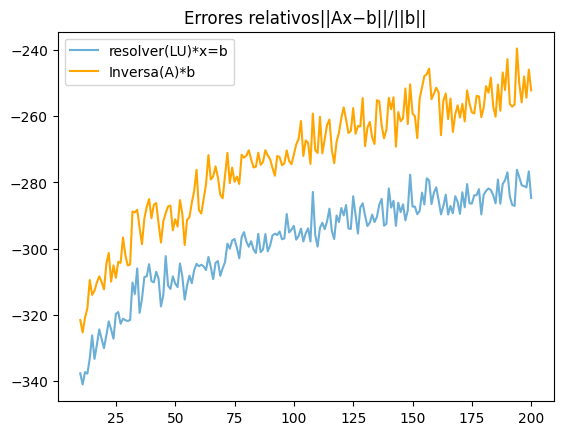

In [7]:
import matplotlib.pyplot as plt

n = np.arange(10, len(v1))
plt.plot(n, v1[10:], label='resolver(LU)*x=b', color='#6baed6')
plt.plot(n, v2[10:], label='Inversa(A)*b', color='orange')
plt.title("Errores relativos||Ax−b||/||b||" )
plt.legend()
plt.show()

Ejercicio 8

In [8]:
import numpy as np

tam_inicial = 10       # Tamaño inicial de la matriz en cada iteración
tam_final = 201        # Tamaño final de la matriz en cada iteración
cant_iteraciones = 10  # Número de veces que se repite el experimento

v1 = np.zeros(tam_final)  # Vector para almacenar los errores relativos del primer método
v2 = np.zeros(tam_final)  # Vector para almacenar los errores relativos del segundo método

for n in range(tam_inicial, tam_final):
    for j in range(cant_iteraciones):
        # Para cada tamaño de matriz, iteramos 10 veces
        
        # Generamos una matriz y un vector aleatorios
        A = np.random.rand(n, n) * 2 - 1

        # Generamos un vector aleatorio x de tamaño n con valores en el intervalo [-1, 1)
        x = np.random.rand(n) * 2 - 1

        b = A @ x

        # Resolvemos el sistema Ax = b utilizando LU_solve
        x1 = resolverLU(A, b)

        # Calculamos el error relativo con el primer método
        err1 =np.log( np.linalg.norm(x1 - x, 2) / np.linalg.norm(x, 2))

        # Resolvemos el sistema Ax = b utilizando la inversa de A
        x2 = inversa(A) @ b

        # Calculamos el error relativo con el segundo método
        err2 =np.log( np.linalg.norm(x2 - x, 2) / np.linalg.norm(x, 2))

        # Sumamos el error relativo al vector correspondiente
        v1[n] += err1
        v2[n] += err2

# v1 y v2 tendrán 201 elementos. Los primeros 10 elementos de cada vector serán ceros.


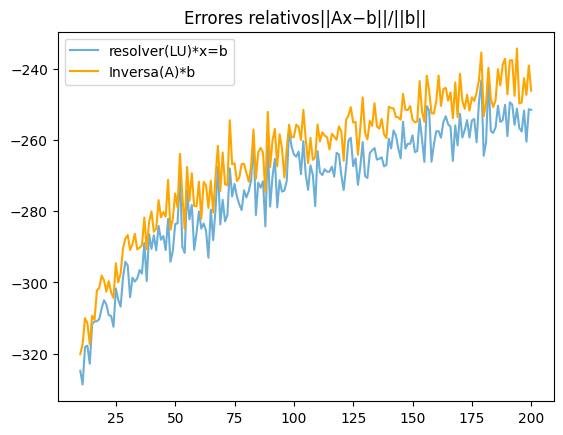

In [9]:


n = np.arange(10, len(v1))
plt.plot(n, v1[10:], label='resolver(LU)*x=b', color='#6baed6')
plt.plot(n, v2[10:], label='Inversa(A)*b', color='orange')
plt.title("Errores relativos||Ax−b||/||b||" )
plt.legend()
plt.show()

Ejercicio 9

In [10]:
tam_inicial = 10       # tamaño inicial de la matriz de cada iteracion
tam_final = 201        # tamaño final de la matriz de cada iteracion
cant_iteraciones = 10  # número de veces que se repite el experimento

v3 = np.zeros(tam_final)  # creamos un vector para almacenar los errores del primer método
v4 = np.zeros(tam_final)  # creamos un vector para almacenar los errores del segundo método

for n in range(tam_inicial,tam_final):
    for j in range(cant_iteraciones):            # para el tamaño de cada matriz iteramos 10 veces
        # Generamos una matriz y vector aleatorios
        A = np.random.rand(n, n) * 2 - 1  
        
        # Generamos un vector aleatorio x de tamaño n con valores en el intervalo [-1, 1)
        x = np.random.rand(n) * 2 - 1
        b = A @ x

        # Resolvemos sistema Ax = b utilizando LU_solve
        x1 = np.linalg.solve(A,b)

        # Calculamos el logaritmo del error relativo con el primer metodo
        err1 = np.log(np.linalg.norm(A @ x1 - b, 2) / np.linalg.norm(b, 2))
        
        # Resolvemos el sistema Ax = b utilizando la inversa de A
        x2 = np.linalg.inv(A) @ b

        # Calculamos el logaritmo del error relativo con el segundo metodo
        err2 = np.log(np.linalg.norm(A @ x2 - b, 2) / np.linalg.norm(b, 2))

        # Sumamos el error al vector correspondiente
        v3[n] += err1
        v4[n] += err2
        
        
 # v3 y v4 van a tener 201 elementos. Los primeros 10 elementos de cada vector van a tener ceros. 

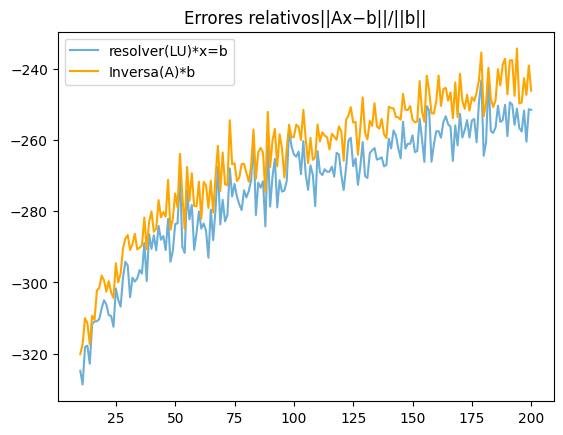

In [11]:
import matplotlib.pyplot as plt

n = np.arange(10, len(v1))
plt.plot(n, v1[10:], label='resolver(LU)*x=b', color='#6baed6')
plt.plot(n, v2[10:], label='Inversa(A)*b', color='orange')
plt.title("Errores relativos||Ax−b||/||b||" )
plt.legend()
plt.show()

Ejercicio 10

In [12]:
import numpy as np

# Define una función para calcular el número de condición de una matriz
def calcular_numero_condicion(A):
    return np.linalg.cond(A)

# Configurar los parámetros del experimento
tam_inicial = 2
tam_final = 21  # Como quieres incluir n = 20
cant_iteraciones = 10

# Iterar a través de los valores de n desde 2 hasta 20
for n in range(tam_inicial, tam_final):
    # Crear la matriz A utilizando la fórmula dada
    A = np.zeros((n, n))
    for i in range(1, n + 1):
        for j in range(1, n + 1):
            A[i - 1, j - 1] = 1 / (i + j - 1)

    # Calcular el número de condición de A
    cond_A = calcular_numero_condicion(A)
    print(f"La matriz A para n={n} tiene un número de condición: {cond_A}")

    # Preparar vectores v1 y v2 para almacenar errores
    v1 = np.zeros(n)
    v2 = np.zeros(n)

    # Repetir el experimento cant_iteraciones veces para cada valor de n
    for j in range(cant_iteraciones):
        # Generar un vector x de tamaño n con valores aleatorios en el rango [-1, 1)
        x = np.random.rand(n) * 2 - 1
        
        # Calcular el vector b como el producto matriz-vector A @ x
        b = np.dot(A, x)

        # Resolver el sistema lineal Ax = b utilizando dos métodos diferentes:

        # Método 1: Resolver utilizando la función resolverLU
        x1 = resolverLU(A, b)

        # Método 2: Resolver utilizando la función inversa
        x2 = inversa(A) @ b

        # Calcular el error relativo de las soluciones obtenidas por cada método
        err1 = np.log(np.linalg.norm(np.dot(A, x1) - b, 2) / np.linalg.norm(b, 2))
        err2 = np.log(np.linalg.norm(np.dot(A, x2) - b, 2) / np.linalg.norm(b, 2))

        # Acumular los errores en los vectores v1 y v2 para su posterior análisis
        v1[n - tam_inicial] += err1
        v2[n - tam_inicial] += err2

# Los resultados están listos para su análisis


La matriz A para n=2 tiene un número de condición: 19.28147006790397
La matriz A para n=3 tiene un número de condición: 524.0567775860644
La matriz A para n=4 tiene un número de condición: 15513.73873892924
La matriz A para n=5 tiene un número de condición: 476607.2502422816
La matriz A para n=6 tiene un número de condición: 14951058.641320305
La matriz A para n=7 tiene un número de condición: 475367356.7411424
La matriz A para n=8 tiene un número de condición: 15257575462.227404
La matriz A para n=9 tiene un número de condición: 493154128042.00494
La matriz A para n=10 tiene un número de condición: 16024540559491.854
La matriz A para n=11 tiene un número de condición: 522518323284632.1


C:\Users\Burgo\AppData\Local\Temp\ipykernel_13540\1348390687.py:45: RuntimeWarning: divide by zero encountered in log
  err1 = np.log(np.linalg.norm(np.dot(A, x1) - b, 2) / np.linalg.norm(b, 2))
C:\Users\Burgo\AppData\Local\Temp\ipykernel_13540\1348390687.py:46: RuntimeWarning: divide by zero encountered in log
  err2 = np.log(np.linalg.norm(np.dot(A, x2) - b, 2) / np.linalg.norm(b, 2))


La matriz A para n=12 tiene un número de condición: 1.7966315359860738e+16
La matriz A para n=13 tiene un número de condición: 7.733240370727108e+17
La matriz A para n=14 tiene un número de condición: 4.8534320574250074e+17
La matriz A para n=15 tiene un número de condición: 2.26208375469606e+17
La matriz A para n=16 tiene un número de condición: 8.781880927991526e+17
La matriz A para n=17 tiene un número de condición: 8.878943985645243e+17
La matriz A para n=18 tiene un número de condición: 8.469484437204447e+17
La matriz A para n=19 tiene un número de condición: 1.266557611092625e+18
La matriz A para n=20 tiene un número de condición: 1.2699042052318198e+19


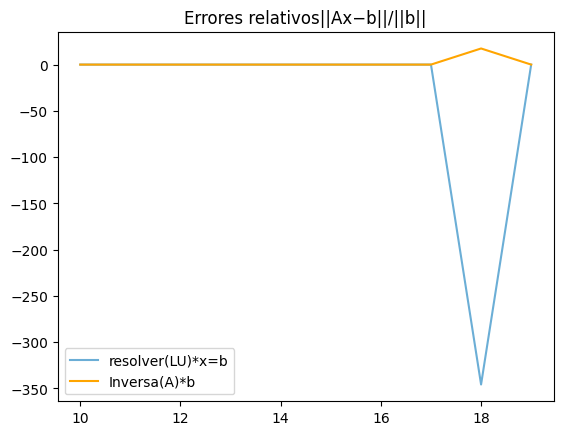

In [13]:
import matplotlib.pyplot as plt

n = np.arange(10, len(v1))
plt.plot(n, v1[10:], label='resolver(LU)*x=b', color='#6baed6')
plt.plot(n, v2[10:], label='Inversa(A)*b', color='orange')
plt.title("Errores relativos||Ax−b||/||b||" )
plt.legend()
plt.show()